In [1]:
# Import our essential tools (libraries)
import pandas as pd  # For handling our data in tables called DataFrames
import os            # For navigating our computer's folders to find files
import matplotlib.pyplot as plt # For creating charts and graphs
import seaborn as sns           # For making our charts look beautiful

# A setting to make our charts look nice
sns.set_style("whitegrid")

print("✅ Tools are ready!")

✅ Tools are ready!


In [2]:
# Define the file paths
RAW_DATA_PATH = '../data/raw/'
PROCESSED_DATA_PATH = '../data/processed/'

In [3]:
# --- Step 1: Find all the CSV files ---
# We'll create a list of the full paths to each of your CSV files.
all_files = [os.path.join(RAW_DATA_PATH, f) for f in os.listdir(RAW_DATA_PATH) if f.endswith('.csv')]
print(f"Found {len(all_files)} data files to combine.")

Found 9 data files to combine.


In [4]:
# --- Step 2: Read and Combine them ---
# We read each CSV file into a DataFrame and put them in a list.
# Then, pd.concat stacks them all on top of each other.
df_list = [pd.read_csv(file) for file in all_files]
df_combined = pd.concat(df_list, ignore_index=True)

In [5]:
# --- Step 3: Save the Combined File ---
# This is a crucial step! We save our new master file so we don't have to repeat this process.
COMBINED_DATA_FILE = os.path.join(PROCESSED_DATA_PATH, 'combined_counseling_data.csv')
df_combined.to_csv(COMBINED_DATA_FILE, index=False)

In [6]:
print(f"🎉 Success! All files are combined into one master file with {len(df_combined)} rows.")
print(f"Master file saved at: {COMBINED_DATA_FILE}")

🎉 Success! All files are combined into one master file with 424060 rows.
Master file saved at: ../data/processed/combined_counseling_data.csv


In [7]:
# Let's look at the first 5 rows to understand the columns
print("--- First 5 Rows of the Data ---")
display(df_combined.head())

# Get a technical summary of the data
print("\n--- Data Info Summary ---")
df_combined.info()

# Get a quick statistical overview of the numerical columns
print("\n--- Statistical Overview ---")
display(df_combined.describe())

--- First 5 Rows of the Data ---


,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank,Year,Round,Counseling Type
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,NaN,3533.0,5947.0,2016,1,JoSAA
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,NaN,1829.0,2213.0,2016,1,JoSAA
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,SC,NaN,663.0,1023.0,2016,1,JoSAA
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,ST,NaN,331.0,357.0,2016,1,JoSAA
4,Indian Institute of Technology Bhubaneswar,Civil Engineering and M. Tech. in Structural E...,AI,OPEN,NaN,5408.0,6561.0,2016,1,JoSAA



--- Data Info Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424060 entries, 0 to 424059
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Institute              424060 non-null  object
 1   Academic Program Name  424059 non-null  object
 2   Quota                  424059 non-null  object
 3   Seat Type              424058 non-null  object
 4   Gender                 368279 non-null  object
 5   Opening Rank           424056 non-null  object
 6   Closing Rank           424056 non-null  object
 7   Year                   424060 non-null  int64 
 8   Round                  424060 non-null  int64 
 9   Counseling Type        424060 non-null  object
dtypes: int64(2), object(8)
memory usage: 32.4+ MB

--- Statistical Overview ---


,Year,Round
count,424060.000000,424060.000000
mean,2020.530635,3.584363
std,2.457713,1.827681
min,2016.000000,1.000000
25%,2019.000000,2.000000
50%,2020.000000,4.000000
75%,2023.000000,5.000000
max,2024.000000,7.000000


## Test

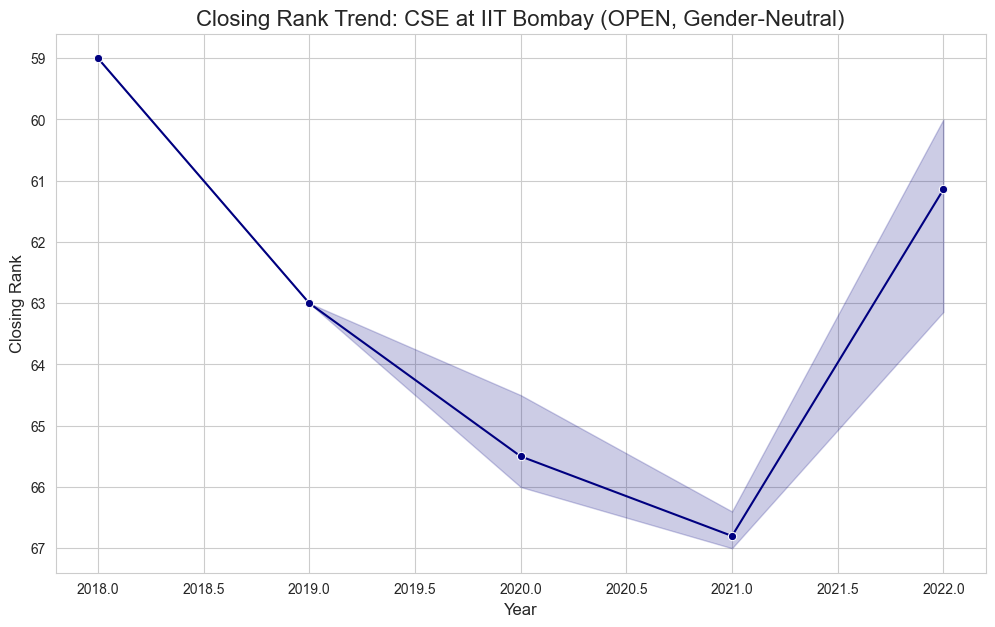

In [8]:
# Filter the data for our specific case
iitb_cse_df = df_combined[
    (df_combined['Institute'] == 'Indian Institute of Technology Bombay') &
    (df_combined['Academic Program Name'] == 'Computer Science and Engineering (4 Years, Bachelor of Technology)') &
    (df_combined['Seat Type'] == 'OPEN') &
    (df_combined['Gender'] == 'Gender-Neutral')
]

# Create the plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=iitb_cse_df, x='Year', y='Closing Rank', marker='o', color='navy')
plt.title('Closing Rank Trend: CSE at IIT Bombay (OPEN, Gender-Neutral)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Rank', fontsize=12)
plt.show()